**<font color = black size=6>珠海二手房房价预测</font>**

**<font color = blue size=4>第一部分:数据爬取以及数据集构建</font>**

<span style="color:purple">1)数据爬取

这段代码是一个简单的 Python 爬虫程序，用于从链家网上爬取珠海地区二手房的数据，并将数据保存到 CSV 文件中。程序主要分为以下几个部分：

Get_url(url): 这个函数用于生成每一页的 URL 地址，其中 url 参数是链家网珠海二手房页面的基础 URL。在这个函数中，通过循环生成每一页的 URL，并将其存储在一个列表中返回。

Get_house_url(all_url, headers): 这个函数用于获取每套房详情信息的 URL。它接收两个参数，all_url 是包含所有页面 URL 的列表，headers 则是 HTTP 请求头，用于模拟浏览器发送请求。在函数中，遍历每一页的 URL，发送 HTTP 请求，解析 HTML 内容，提取每套房的详情页 URL，并调用 Analysis_html() 函数进行详情页信息的解析。

Analysis_html(url_ls, headers): 这个函数用于解析每套房详情页的 HTML 内容，提取房源的各种信息，如小区名、价格、地区、房屋基本属性等。然后调用 Save_data() 函数将这些信息保存到 CSV 文件中。

Save_data(name, money, area, data): 这个函数用于将爬取到的房源信息保存到 CSV 文件中。它接收房源的各种信息作为参数，并将这些信息以列表形式写入 CSV 文件。

在主程序中，首先定义了要爬取的链家网珠海二手房页面的基础 URL 和 HTTP 请求头。然后调用 Get_url() 函数生成所有页面的 URL 列表，并调用 Get_house_url() 函数开始爬取数据。最后，将爬取到的数据保存到 CSV 文件中。

In [28]:
#从链家网爬取珠海二手房数据，保存到original.csv文件中
import requests,time,csv
import pandas as pd
from lxml import etree
 
#获取每一页的url
def Get_url(url):
    all_url=[]
    for i in range(402,800):
        all_url.append(url+'pg'+str(i)+'/') #储存每一个页面的url
    return all_url
 
 #获取每套房详情信息的url
def Get_house_url(all_url,headers):
    num=0
    #简单统计页数
    for i in all_url:
        r=requests.get(i,headers=headers)
        html=etree.HTML(r.text)
        url_ls=html.xpath("//ul[@class='sellListContent']/li/a/@href") #获取房子的url
        Analysis_html(url_ls,headers)
        time.sleep(1)
        print("第%s页爬完了"%i)
        num+=1

 #获取每套房的详情信息
def Analysis_html(url_ls,headers):
    for i in url_ls: #num记录爬取成功的索引值
        r=requests.get(i,headers=headers)
        html=etree.HTML(r.text)
        name=(html.xpath("//div[@class='communityName']/a/text()"))[0].split() #获取房名
        money = html.xpath("//span[@class='total']/text()" )# 获取价格
        area = html.xpath("//span[@class='info']/a[1]/text()")  # 获取地区
        data = html.xpath("//div[@class='content']/ul/li/text()")# 获取房子基本属性

        Save_data(name,money,area,data)
 
 #把爬取的信息存入文件
def Save_data(name, money, area, data):
    result=[name[0]]+money+[area]+data #把详细信息合为一个列表
    with open(r'originaldata.csv','a',encoding='utf_8_sig',newline='')as f:
        wt=csv.writer(f)
        wt.writerow(result)
        print('已写入')
        f.close()

if __name__=='__main__':
    url='https://zh.lianjia.com/ershoufang/'
    headers={
        "Upgrade-Insecure-Requests":"1",
        "User-Agent":"Mozilla/5.0(Windows NT 10.0;Win64;x64) AppleWebKit/537.36(KHTML,like Gecko)Chrome"
                      "/72.0.3626.121 Safari/537.36"
     }
    all_url=Get_url(url)
#     with open(r'originaldata.csv', 'a', encoding='utf_8_sig', newline='') as f:
#         #首先加入表格头
#         table_label=['小区名', '价格/万', '地区', '0', '房屋户型', '1', '所在楼层', '2', '建筑面积', '3', '户型结构', '4', '套内面积', '5', '建筑类型', '6', '房屋朝向', '7', '建筑结构', '8', '装修情况', '9', '梯户比例', '10', '配备电梯']
# #         table_label=['Community','Price','Region','0','House type','1','Floor','2','Area','3','House structure','4','Inside area','5','Type of building','6','Facing','7','Structure','8','Renovation','9','Proportion of elevator households','10','Elevator']
#         wt=csv.writer(f)
#         wt.writerow(table_label)
    Get_house_url(all_url,headers)
#爬完之后记得用notepad将csv文件编码格式手动修改为utf-8，将所有特殊字符删除，将后面的无关列删除

已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
第https://zh.lianjia.com/ershoufang/pg402/页爬完了
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
第https://zh.lianjia.com/ershoufang/pg403/页爬完了
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
第https://zh.lianjia.com/ershoufang/pg404/页爬完了
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
第https://zh.lianjia.com/ershoufang/pg405/页爬完了
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
第https://zh.lianjia.com/ershoufang/pg406/页爬完了
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
已写入
第https://zh.lianjia.com/ershoufang/pg407/页爬完了
已写入


KeyboardInterrupt: 

<span style="color:purple">2)数据集构建
    
原始数据集中含有很多定性变量，例如装修情况、楼层高度等等，需要用虚拟变量来代替原先的定性变量。
    
原先数据集中含有很多多余的列以及信息不明确的数据需要去除。

In [3]:
#使用0和1来达到用虚拟变量列代替原名义变量所在类别的目的
#构建新的数据集updateddata.csv
import pandas as pd

# 读取 CSV 文件并加载数据到 DataFrame 中
data = pd.read_csv('originaldata.csv')

#删除部分无关列
for i in range(0, 11):
    column_to_delete = str(i)
    data = data.drop(columns=[column_to_delete])
data = data.drop(columns=['小区名'])
data = data.drop(columns=['房屋朝向'])
data = data.drop(columns=['建筑结构'])
data = data.drop(columns=['梯户比例'])


# 删除包含 '暂无数据' 的行
data = data[data.apply(lambda row: '暂无数据' not in row.values, axis=1)]
data.reset_index(drop=True, inplace=True)# 重置索引

#将‘户型结构’列转换
data['复式'] = 0
data['错层'] = 0
for i in range(0, data.shape[0]):
    string = data.loc[i, '户型结构']
    if string == '复式':
        data.loc[i, '复式'] = 1
    elif string == '错层':
        data.loc[i, '错层'] = 1
data = data.drop(columns=['户型结构'])

#将‘所在楼层’列转换
data['高楼层'] = 0
data['中楼层'] = 0
for i in range(0, data.shape[0]):
    string = data.loc[i, '所在楼层']
    if string.find('高楼层') != -1:
        data.loc[i, '高楼层'] = 1
    elif string.find('中楼层') != -1:
        data.loc[i, '中楼层'] = 1
data = data.drop(columns=['所在楼层'])

#将‘建筑类型’列转换
data['板楼'] = 0
data['塔楼'] = 0
for i in range(0, data.shape[0]):
    string = data.loc[i, '建筑类型']
    if string == '板楼':
        data.loc[i, '板楼'] = 1
    elif string == '塔楼':
        data.loc[i, '塔楼'] = 1
data = data.drop(columns=['建筑类型'])

#将‘装修情况’列转换
data['毛坯'] = 0
data['简装'] = 0
data['精装'] = 0
for i in range(0, data.shape[0]):
    string = data.loc[i, '装修情况']
    if string == '毛坯':
        data.loc[i, '毛坯'] = 1
    elif string == '简装':
        data.loc[i, '简装'] = 1
    elif string == '精装':
        data.loc[i, '精装'] = 1
data = data.drop(columns=['装修情况'])   

#删除特殊字符并将面积类型改为float
data['建筑面积'] = data['建筑面积'].replace({'㎡': ''}, regex=True).astype(float)
data['套内面积'] = data['套内面积'].replace({'㎡': ''}, regex=True).astype(float)
data['地区'] = data['地区'].apply(lambda x: x[2:-2])

#将‘房屋户型’分成4列，分别是‘卧室数’、‘客厅数’、‘厨房数’、‘卫生间数’,根据‘地区’来增加‘地区平均房价’列
data['卧室数'] = 0
data['客厅数'] = 0
data['厨房数'] = 0
data['卫生间数'] = 0
data['地区平均房价'] = 0.0

for i in range(0, data.shape[0]):
    string = data.loc[i, '房屋户型']
    position = string.find('室')
    data.loc[i, '卧室数'] = int(string[position-1])
    position = string.find('厅')
    data.loc[i, '客厅数'] = int(string[position-1])
    position = string.find('厨')
    data.loc[i, '厨房数'] = int(string[position-1])
    position = string.find('卫')
    data.loc[i, '卫生间数'] = int(string[position-1])
    if data.loc[i, '配备电梯'] == '有':
        data.loc[i, '配备电梯'] = 1
    else:
        data.loc[i, '配备电梯'] = 0
    #地区平均房价来源：58同城2024年6月二手房均价统计，https://zh.58.com/fangjia/18393/?PGTID=0d003508-0000-02a3-ff30-fc41760881ac&ClickID=1
    if data.loc[i, '地区'] == '香洲区':
        data.loc[i, '地区平均房价'] = float(2.3838)
    elif data.loc[i, '地区'] == '斗门区':
        data.loc[i, '地区平均房价'] = float(0.9573)
    elif data.loc[i, '地区'] == '金湾区':
        data.loc[i, '地区平均房价'] = float(1.2652)
    elif data.loc[i, '地区'] == '高新区':
        data.loc[i, '地区平均房价'] = float(1.5340)
    elif data.loc[i, '地区'] == '横琴区':
        data.loc[i, '地区平均房价'] = float(3.2891)
    else:
        data.loc[i, '地区平均房价'] = float(2.0587)
    
#删除部分无关列
data = data.drop(columns=['房屋户型']) 
data = data.drop(columns=['地区'])
data = data.drop(columns=['Unnamed: 25'])
data = data.drop(columns=['Unnamed: 26'])
data = data.drop(columns=['Unnamed: 27'])
data = data.drop(columns=['Unnamed: 28'])
data = data.drop(columns=['Unnamed: 29'])
data = data.drop(columns=['Unnamed: 30'])
data = data.drop(columns=['Unnamed: 31'])
data = data.drop(columns=['Unnamed: 32'])
data = data.drop(columns=['Unnamed: 33'])
data = data.drop(columns=['Unnamed: 34'])
data = data.drop(columns=['Unnamed: 35'])
data = data.drop(columns=['Unnamed: 36'])
data = data.drop(columns=['Unnamed: 37'])

# 获取第一列的数据
first_column = data.iloc[:, 0]
# 删除第一列
data = data.drop(data.columns[0], axis=1)
# 将第一列数据添加到 DataFrame 的末尾
data['价格/万'] = first_column  # 这里可以指定新列的名称

print("Total number of rows:", data.shape[0])
print(data.head())
data.to_csv('updateddata.csv', index=False)#处理后的数据保存在另一个文件中

Total number of rows: 2866
     建筑面积    套内面积 配备电梯  复式  错层  高楼层  中楼层  板楼  塔楼  毛坯  简装  精装  卧室数  客厅数  厨房数  \
0   92.62   74.03    1   0   0    1    0   0   0   0   0   1    3    2    1   
1   90.70   68.60    1   0   0    1    0   0   0   1   0   0    3    2    1   
2  107.34   83.98    1   0   0    1    0   0   0   0   0   1    4    2    1   
3  116.68  102.42    0   0   0    1    0   1   0   0   0   0    3    2    1   
4   32.37   22.83    1   0   0    1    0   0   0   0   0   1    1    1    1   

   卫生间数  地区平均房价   价格/万  
0     2  1.2652  170.0  
1     2  1.2652   90.0  
2     2  1.2652  215.0  
3     2  0.9573   65.0  
4     1  0.9573   36.0  


**<font color = blue size=4>第二部分:随机森林模型构建与评估</font>**

<span style="color:purple">1)训练集与测试集划分
    
将数据集中25%的数据作为测试集，75%的数据作为训练集。

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

data = pd.read_csv("updateddata.csv")
print(data.head())

x = data.drop('价格/万', axis=1)  # 特征列
y = data['价格/万']  # 目标列

# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# 打印训练集和测试集的大小
print("训练集大小:", x_train.shape, y_train.shape)
print("测试集大小:", x_test.shape, y_test.shape)

     建筑面积    套内面积  配备电梯  复式  错层  高楼层  中楼层  板楼  塔楼  毛坯  简装  精装  卧室数  客厅数  厨房数  \
0   92.62   74.03     1   0   0    1    0   0   0   0   0   1    3    2    1   
1   90.70   68.60     1   0   0    1    0   0   0   1   0   0    3    2    1   
2  107.34   83.98     1   0   0    1    0   0   0   0   0   1    4    2    1   
3  116.68  102.42     0   0   0    1    0   1   0   0   0   0    3    2    1   
4   32.37   22.83     1   0   0    1    0   0   0   0   0   1    1    1    1   

   卫生间数  地区平均房价   价格/万  
0     2  1.2652  170.0  
1     2  1.2652   90.0  
2     2  1.2652  215.0  
3     2  0.9573   65.0  
4     1  0.9573   36.0  
训练集大小: (2149, 17) (2149,)
测试集大小: (717, 17) (717,)


<span style="color:purple">2)模型训练与评估
    
训练模型后，分析模型在测试集和整个数据集上的均方误差、绝对平均误差以及决定系数三项指标。

模型在测试集上的均方误差: 478.4930418369557
模型在测试集上的绝对平均误差: 7.575672710367273
模型在测试集上的决定系数: 0.9619026098834969
模型在整个数据集上的均方误差: 192.32339887511935
模型在整个数据集上的绝对平均误差: 4.218579945917655
模型在整个数据集上的决定系数: 0.9846554784607627


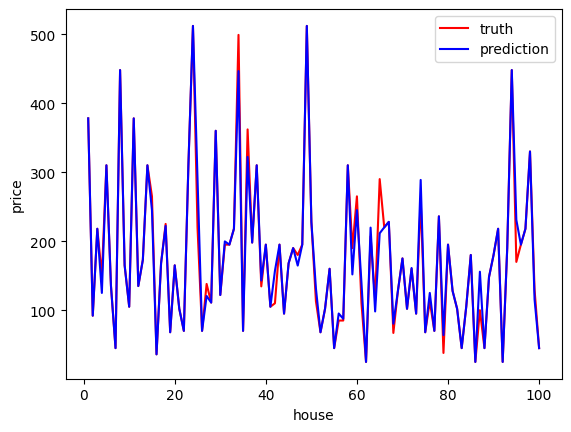

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt  

regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(x_train, y_train)

# 在测试集上进行预测
y_pred = regressor.predict(x_test)
# 计算模型在测试集上的均方误差（Mean Squared Error）
mse = metrics.mean_squared_error(y_test, y_pred)
print("模型在测试集上的均方误差:", mse)
# 计算模型在测试集上的绝对平均误差（Mean Absolute Error）
mae = metrics.mean_absolute_error(y_test, y_pred)
print("模型在测试集上的绝对平均误差:", mae)
# 计算模型在测试集上的决定系数（R^2 Score）
r2 = metrics.r2_score(y_test, y_pred)
print("模型在测试集上的决定系数:", r2)

# 在整个数据集上进行预测
y_allpred = regressor.predict(x)
# 计算模型在整个数据集上的均方误差（Mean Squared Error）
mse = metrics.mean_squared_error(y, y_allpred)
print("模型在整个数据集上的均方误差:", mse)
# 计算模型在整个数据集上的绝对平均误差（Mean Absolute Error）
mae = metrics.mean_absolute_error(y, y_allpred)
print("模型在整个数据集上的绝对平均误差:", mae)
# 计算模型在整个数据集上的决定系数（R^2 Score）
r2 = metrics.r2_score(y, y_allpred)
print("模型在整个数据集上的决定系数:", r2)

index = list(range(1, 101))
plt.xlabel('house')  
plt.ylabel('price')  
plt.plot(index, y_test[0:100], color='r',label='truth')
plt.plot(index, y_pred[0:100], color='b',label='prediction')
plt.legend()
plt.show()

**<font color = blue size=4>第三部分:随机森林模型优化</font>**

<span style="color:purple">1)训练集与测试集划分
    
将数据集中25%的数据作为测试集，75%的数据作为训练集。

In [6]:
import pydot
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

data = pd.read_csv("updateddata.csv")
print(data.head())

x = data.drop('价格/万', axis=1)  # 特征列
y = data['价格/万']  # 目标列

# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# 打印训练集和测试集的大小
print("训练集大小:", x_train.shape, y_train.shape)
print("测试集大小:", x_test.shape, y_test.shape)

     建筑面积    套内面积  配备电梯  复式  错层  高楼层  中楼层  板楼  塔楼  毛坯  简装  精装  卧室数  客厅数  厨房数  \
0   92.62   74.03     1   0   0    1    0   0   0   0   0   1    3    2    1   
1   90.70   68.60     1   0   0    1    0   0   0   1   0   0    3    2    1   
2  107.34   83.98     1   0   0    1    0   0   0   0   0   1    4    2    1   
3  116.68  102.42     0   0   0    1    0   1   0   0   0   0    3    2    1   
4   32.37   22.83     1   0   0    1    0   0   0   0   0   1    1    1    1   

   卫生间数  地区平均房价   价格/万  
0     2  1.2652  170.0  
1     2  1.2652   90.0  
2     2  1.2652  215.0  
3     2  0.9573   65.0  
4     1  0.9573   36.0  
训练集大小: (2149, 17) (2149,)
测试集大小: (717, 17) (717,)


<span style="color:purple">2)超参数范围给定
 
首先，我们需要对随机森林模型超参数各自的范围加以确定，之后我们将在这些范围内确定各个超参数的最终最优取值。

在此，我们先要确定对哪些超参数进行择优。我们选择在随机森林算法中比较重要的几个超参数进行调优，分别是：决策树个数n_estimators，决策树最大深度max_depth，最小分离样本数（即拆分决策树节点所需的最小样本数）min_samples_split。

In [5]:
from pprint import pprint

n_estimators_range=[int(x) for x in np.linspace(start=50,stop=2000,num=40)]
max_depth_range=[int(x) for x in np.linspace(10,300,num=30)]
# max_depth_range.append(None)
min_samples_split_range=[2,5,10]

random_forest_hp_range={'n_estimators':n_estimators_range,#决策树个数
                        'max_depth':max_depth_range,#决策树最大深度
                        'min_samples_split':min_samples_split_range,#最小分离样本数
                        }
pprint(random_forest_hp_range)

{'max_depth': [10,
               20,
               30,
               40,
               50,
               60,
               70,
               80,
               90,
               100,
               110,
               120,
               130,
               140,
               150,
               160,
               170,
               180,
               190,
               200,
               210,
               220,
               230,
               240,
               250,
               260,
               270,
               280,
               290,
               300],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50,
                  100,
                  150,
                  200,
                  250,
                  300,
                  350,
                  400,
                  450,
                  500,
                  550,
                  600,
                  650,
                  700,
                  750,
                  800,
       

<span style="color:purple">3)超参数随机匹配择优
    
上面我们确定了每一种超参数各自的范围，那么接下来我们就将他们分别组合，对比每一个超参数取值组合所得到的模型结果，从而确定最优超参数组合。

我们上面划定了三种超参数，如果按照排列组合来计算的话，会有很多很多种组合方式，如果要一一尝试未免也太麻烦了。因此，我们用到RandomizedSearchCV这一功能——其将随机匹配每一种超参数组合，并输出最优的组合。换句话说，我们用RandomizedSearchCV来进行随机的排列，而不是对所有的超参数排列组合方法进行遍历。这样子确实可以节省很多时间。
    
我们首先建立一个随机森林模型random_forest_model_test_base，并将其带入到RandomizedSearchCV中；其中，RandomizedSearchCV的参数组合就是刚刚我们看的random_forest_hp_range，n_iter就是具体随机搭配超参数组合的次数（这个次数因此肯定是越大涵盖的组合数越多，效果越好，但是也越费时间），cv是交叉验证的折数（RandomizedSearchCV衡量每一种组合方式的效果就是用交叉验证来进行的），n_jobs与verbose是关于模型线程、日志相关的信息，random_state是随机森林中随机抽样的随机数种子。

之后，我们对random_forest_model_test_random加以训练，并获取其所得到的最优超参数匹配组合best_hp_now。在这里，模型的训练次数就是n_iter与cv的乘积（因为交叉验证有几折，那么就需要运行几次；而一共有n_iter个参数匹配组合，因此总次数就是二者相乘）。

In [38]:
random_forest_model_test_base=RandomForestRegressor()
random_forest_model_test_random=RandomizedSearchCV(estimator=random_forest_model_test_base,
                                                   param_distributions=random_forest_hp_range,
                                                   n_iter=100,#随机搭配的超参数组合次数
                                                   n_jobs=-1,
                                                   cv=3,#交叉验证的折数
                                                   verbose=1,
                                                   random_state=42
                                                   )
random_forest_model_test_random.fit(x_train,y_train)

best_hp_now=random_forest_model_test_random.best_params_
pprint(best_hp_now)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}


<span style="color:purple">4)超参数遍历匹配择优

刚刚我们基于RandomizedSearchCV，实现了超参数随机匹配与择优，但是此时的结果是一个随机不完全遍历后所得的结果，因此其最优组合可能并不是全局最优的，而只是一个大概的最优范围。因此接下来，我们需要依据上述所得到的随机最优匹配结果，进行遍历全部组合的匹配择优。

遍历匹配即在随机匹配最优结果的基础上，在其临近范围内选取几个数值，并通过GridSearchCV对每一种匹配都遍历，从而选出比较好的超参数匹配组合。

In [7]:
random_forest_hp_range_2={'n_estimators':[1330,1340,1350,1360,1370],
                          'max_depth':[200,210,220,230,240],
                          'min_samples_split':[2,3] 
                          }
random_forest_model_test_2_base=RandomForestRegressor()
random_forest_model_test_2_random=GridSearchCV(estimator=random_forest_model_test_2_base,
                                               param_grid=random_forest_hp_range_2,
                                               cv=3,
                                               verbose=1,
                                               n_jobs=-1)
random_forest_model_test_2_random.fit(x_train,y_train)

best_hp_now_2=random_forest_model_test_2_random.best_params_
pprint(best_hp_now_2)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'max_depth': 240, 'min_samples_split': 2, 'n_estimators': 1370}


<span style="color:purple">5)模型评估
    
分析模型在测试集和整个数据集上的均方误差、绝对平均误差以及决定系数三项指标。

模型在测试集上的均方误差: 448.3774144325129
模型在测试集上的绝对平均误差: 7.442564337000879
模型在测试集上的决定系数: 0.9643004019212361
模型在整个数据集上的均方误差: 183.21236192265303
模型在整个数据集上的绝对平均误差: 4.132638649815203
模型在整个数据集上的决定系数: 0.9853824025042208


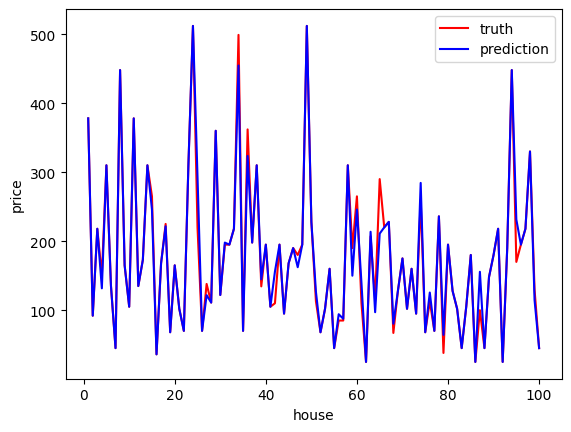

In [9]:
random_forest_model_test_2_random = RandomForestRegressor(max_depth=220, min_samples_split=2, n_estimators=1350)
random_forest_model_test_2_random.fit(x_train,y_train)

# 在测试集上进行预测
y_pred = random_forest_model_test_2_random.predict(x_test)
# 计算模型在测试集上的均方误差（Mean Squared Error）
mse = metrics.mean_squared_error(y_test, y_pred)
print("模型在测试集上的均方误差:", mse)
# 计算模型在测试集上的绝对平均误差（Mean Absolute Error）
mae = metrics.mean_absolute_error(y_test, y_pred)
print("模型在测试集上的绝对平均误差:", mae)
# 计算模型在测试集上的决定系数（R^2 Score）
r2 = metrics.r2_score(y_test, y_pred)
print("模型在测试集上的决定系数:", r2)

# 在整个数据集上进行预测
y_allpred = random_forest_model_test_2_random.predict(x)
# 计算模型在整个数据集上的均方误差（Mean Squared Error）
mse = metrics.mean_squared_error(y, y_allpred)
print("模型在整个数据集上的均方误差:", mse)
# 计算模型在整个数据集上的绝对平均误差（Mean Absolute Error）
mae = metrics.mean_absolute_error(y, y_allpred)
print("模型在整个数据集上的绝对平均误差:", mae)
# 计算模型在整个数据集上的决定系数（R^2 Score）
r2 = metrics.r2_score(y, y_allpred)
print("模型在整个数据集上的决定系数:", r2)

index = list(range(1, 101))
plt.xlabel('house')  
plt.ylabel('price')  
plt.plot(index, y_test[0:100], color='r',label='truth')
plt.plot(index, y_pred[0:100], color='b',label='prediction')
plt.legend()
plt.show()

<span style="color:purple">6)模型使用
    
输入你对房子的要求，模型会计算出这种房子的价格。

In [10]:
建筑面积 = [100]
套内面积 = [90]
配备电梯 = [1]#1表示有，0表示无
户型结构 = [0,0,1]#[复式，错层，平层]
所在楼层 = [0,0,1]#[高楼层，中楼层，低楼层]
建筑类型 = [0,1,0]#[板楼，塔楼，板塔结合]
装修情况 = [0,0,1,0]#[毛坯，简装，精装，其它]
卧室数 = [3]
客厅数 = [1]
厨房数 = [1]
卫生间数 = [2]
地区 = '香洲区'#香洲、斗门、金湾、高新、横琴
#在上面修改房屋参数

地区平均房价 = 0.0
if 地区 == '香洲区':
    地区平均房价 = [float(2.3838)]
elif 地区 == '斗门区':
    地区平均房价 = [float(0.9573)]
elif 地区 == '金湾区':
    地区平均房价 = [float(1.2652)]
elif 地区 == '高新区':
    地区平均房价 = [float(1.5340)]
elif 地区 == '横琴区':
    地区平均房价 = [float(3.2891)]
else:
    地区平均房价 = [float(2.0587)]

result = 建筑面积 + 套内面积 + 配备电梯 + 户型结构[:2] + 所在楼层[:2] + 建筑类型[:2] + 装修情况[:3] + 卧室数 + 客厅数 + 厨房数 + 卫生间数 + 地区平均房价
random_forest_model_test_2_random.predict([result])

D:\Anaconda\envs\pytorch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([228.7237037])